<a href="https://colab.research.google.com/github/mathdeoliveira/Portfolio_DataScience/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

# Introdução

Neste projeto vamos explorar os dados de criminalidade da cidade do Rio de Janeiro. O nosso conjuto de dados têm crimes que ocorreram na cidade iniciado no ano de 1991 até 2019.

Iremos seguir a [metodologia proposta](https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science) como um norte para o nosso projeto. Vamos iniciar na análise dos dados. 

## Obtenção dos Dados

Os dados foram retirados do site [ISP Dados Abertos](http://www.ispdados.rj.gov.br/) que é um portal onde pode-se encontrar as bases de dados de registros criminais e de atividade policial do estado do Rio de Janeiro.

Os nosso dados contém várias variáveis que podemos analisar sobre o crime da cidade, por exemplo os `roubos de veículos`, `homícidios dolosos`, `sequestro` ,etc. 

Vamos primeiramente fazer o entendimento dos dados, verificaremos a qualidade dos dados e os formatos das suas entradas e variáveis.

### Importando os dados

Vamos iniciar importando as bibliotecas necessárias e o ler os dados de um `.csv` e carregar em um dataframe.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
%%time
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv")

CPU times: user 12.8 ms, sys: 2.04 ms, total: 14.9 ms
Wall time: 211 ms


In [0]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


## Análise Inicial dos Dados

Nessa seção vamos iniciar uma análise dos dados afim de conhecer os dados contidos no dataframe, vamos descobri o tamanho, os nomes das colunas, os tipos dos dados das variáveis e a porcentagem de dados ausentes.




### Qual a quantidade de dados que possuímos?

In [0]:
# verifica o tamanho do nosso dataframe
df.shape

(344, 56)

Portanto temos 344 entradas e 56 variáveis em nosso dataframe.

### Quais são os nomes das nossas colunas?

In [0]:
# imprimir os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

### Quais são os tipos das nossas variáveis?

In [0]:
# imprimir os tipos dos dados de cada coluna
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### Qual é a porcentagem de dados nulos presente do nosso dataset?

In [0]:
# imprimir a porcentagem de dados nulos do nosso dataset
qtd_nulls = (df.isnull().sum() / df.shape[0]) *100
qtd_nulls.sort_values(ascending = False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Com o resultado acima podemos visualizar que:
* As colunas `roubo_bicicleta` e `furto_bicicleta` contém 80% de dados ausentes; 
* As colunas `apreensao_drogas_sem_autor`, `posse_drogas`, `apf`, `aaapai`, `cmp`,`trafico_drogas`, `cmba` contém 52% de dados faltantes;

## Informações Estatísticas da Violência no Rio de Janeiro

Vamos executar alguns processos afim de visualizar informações estatísticas sobre a violência no Rio de Janeiro, um resumo estatístico das variáveis, os valores máximos e mínimos de homicídios dolosos e a média de roubo de veículos.


### Qual é o resumo estatístico das nossas variáveis?

In [0]:
# imprimir o resumo estatístico do nosso dataframe
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Quais são as médias de roubo de veículo, furto de veículo e recuperação de veículos?

In [0]:
mean_roubo_veiculo        = df.roubo_veiculo.mean()
mean_furto_veiculos       = df.furto_veiculos.mean()
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()

print("Média do roubo de veículos:", mean_roubo_veiculo)
print("Média do furto de veículos:", mean_furto_veiculos)
print("Média da recuperação de veículos:", mean_recuperacao_veiculos)

Média do roubo de veículos: 2448.6976744186045
Média do furto de veículos: 1674.671511627907
Média da recuperação de veículos: 1772.2383720930231


### Qual a porcentagem de carros recuperados em relação aos carros roubados e carros furtados?

In [0]:
(mean_recuperacao_veiculos / (mean_roubo_veiculo + mean_furto_veiculos))*100

42.980346705075085

Com o resultado acima, podemos ver que aproximadamente 43% dos veículos roubados e furtados são recuperados.

### Qual são os valores máximo e o mínimo de homicídio doloso e a data?

In [0]:
max_hom_doloso = df[['vano', 'mes','hom_doloso']].loc[df['hom_doloso']==df.hom_doloso.max()]
min_hom_doloso = df[['vano', 'mes','hom_doloso']].loc[df['hom_doloso']==df.hom_doloso.min()]

print(max_hom_doloso)
print(min_hom_doloso)

    vano  mes  hom_doloso
48  1995    1         831
     vano  mes  hom_doloso
293  2015    6         272


Temos que, no ano de `1995` no mês de `Janeiro` tivemos `831` homicídios dolosos, sendo o maior número entre todos os anos de nosso dados e no ano de `2015` no mês de `Junho` tivemos `272` homicidios dolosos, sendo o menor valor entre todos os anos do nosso dataset.

## Visualização de Dados

A visualização de dados consiste em representar os dados de uma forma visual, assim podemos usar os nosso dados para o melhor entendimento para um ser humano.

Com isso, vamos ter uma forma gráfica de visualizar os dados da violência no Rio de Janeiro, olhar a distribuição dos dados sobre homicídio doloso, a evolução dos crimes ao decorrer do tempo e comparação entre os crimes.


### Como está a distribuição dos dados para a variável `hom_doloso` (homicídio doloso)?

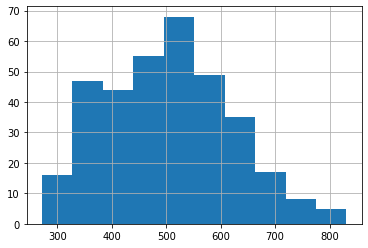

In [0]:
# plotar histograma sobre homicídio doloso
df.hom_doloso.hist();

Com isso conseguimos identificar que existe uma quantidade maior de dados entre 450 e 550 homícidios dolosos em nosso conjunto de dados.

### Qual é a evolução dos homicídios dolosos na cidade?

In [0]:
# dados sumarizados para cada ano
df.groupby("vano").hom_doloso.sum().sort_values(ascending = False).head(5)

vano
1995    8438
1994    8408
1993    7720
1992    7635
1991    7518
Name: hom_doloso, dtype: int64

O resultado acima esclarece que o ano de 1995 foi o ano no qual a cidade teve mais homicídios dolosos, seguido logo pelo ano de 1994.

Para uma visualização mais clara, vamos plotar o resultado de todos os anos e o valor de homicídios dolosos que temos no nosso conjunto de dados.

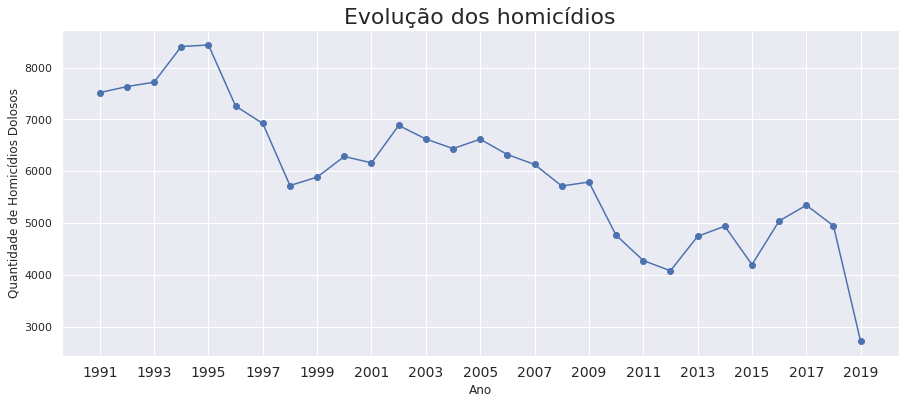

In [0]:
# plotar gráfico de evolução
anos = df.groupby("vano").hom_doloso.sum().keys()  
sum_hom_doloso = df.groupby("vano").hom_doloso.sum().values
plt.figure(figsize=(15,6))
plt.xticks(range(1991, 2020, 2), fontsize=14)  
plt.plot(anos, sum_hom_doloso, marker='o')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Homicídios Dolosos')
plt.title("Evolução dos homicídios", fontsize=22)
plt.show()

O gráfico acima nos mostra a evolução da quantidade de homicídios dolosos ao decorrer do tempo, como foi falado acima, o ano de 1994 foi o pico de homicídios dolosos. 

Podemos perceber uma crescente entre os anos de 2001 e 2002, também temos entre o ano de 2012 e 2018. Para uma futura análise poderíamos verificar o que aconteceu nesses anos para justificar esse aumento, também podemos verificar se teve aumento nas variáveis que são diretamente correlacionadas ao homicídio doloso, como por exemplo ameaça, tentativa de homicídio, etc.

### Qual é a evolução dos crimes relacionados ao homicídios e drogas?

Vamos analisar a evolução dos crimes relacionados ao homicídio e drogas na cidade do Rio de Janeiro, por isso vamos escolher alguns indicadores que vem no nosso dataset.

In [0]:
# variavel com colunas desejadas
columns = ['hom_doloso','latrocinio','tentat_hom','hom_culposo', 'ameaca','apreensao_drogas','posse_drogas','trafico_drogas','apreensao_drogas_sem_autor']

# criando o novo dataframe
# o comando abaixo faz a soma de cada coluna agrupando por ano e caso tenha valores NaN será substituído por 0
new_df = df.set_index('vano').stack().sum(level=[0,1]).unstack().fillna(0)

# selecionado colunas desejadas
new_df = new_df[columns]

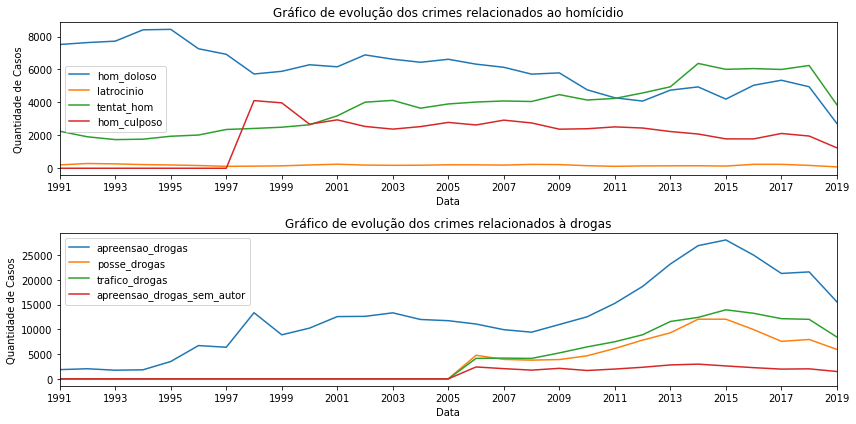

In [0]:
# plotar gráficos

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
columns_hom = ['hom_doloso','latrocinio','tentat_hom','hom_culposo']
columns_drogas = ['apreensao_drogas','posse_drogas','trafico_drogas','apreensao_drogas_sem_autor']

new_df[columns_hom].plot(ax=ax1)
ax1.set_title("Gráfico de evolução dos crimes relacionados ao homícidio")
ax1.set_ylabel("Quantidade de Casos")
ax1.set_xlabel("Data")
ax1.set_xticks(range(1991, 2020, 2))

new_df[columns_drogas].plot(ax=ax2)
ax2.set_title("Gráfico de evolução dos crimes relacionados à drogas")
ax2.set_ylabel("Quantidade de Casos")
ax2.set_xlabel("Data")
ax2.set_xticks(range(1991, 2020, 2))

plt.tight_layout()

Os gráficos acima nos dá um panorama da evolução de crimes na cidade do Rio de Janeiro, assim no primeiro gráfico temos que:
* Houve uma redução de homicídios dolosos na cidade, mas um aumento na tentativa de homícidios registrados.
* Houve um pico de homicídios culposos no ano de 1998, esse pico pode ser explicado por início de registro de crime desse tipo, já que antes a quantidade era 0.
* Há uma crescente nas tentativas de homicídios, mas em contrapartida a quantidade de homicídios dolosos diminuíram.

Para o segundo gráfico, podemos identificar algumas análises:
* Para os indicadores de posse de drogas, tráfico de drogas e apreensão de drogras sem autor, o início de dados começou no ano de 2005.
* A apreensão de drogas teve um crescimento iniciando no ano de 2006 até o ano de 2015, para uma análise poderiamos apronfundar e entender porque se teve esse crescimento.

## Conclusão

Ainda existe muitas maneiras de expandir essa análise inicial, poderíamos cruzar esses dados com mais base de dados do próprio portal para uma visualização mais completa e criação de limites para cada crime e olhar qual data houve um excesso daquele crime. Mas, com esses dados podemos trazer ótimos insights,podemos ver que houve uma queda na quantidade de homicídios dolosos ao decorrer do tempo, a porcentagem de carros roubados/furtados que foram recuperados e a data que tivemos maior casos de homicídios dolosos.



Redes sociais:

https://github.com/mathdeoliveira

https://www.linkedin.com/in/matheus-de-oliveira-alves/